In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import itertools

In [2]:
results = pd.DataFrame()
results['Tiny_prePT'] = pd.read_csv('ViT_Tiny_prePT.csv').Precision.values
results['Tiny_PT'] = pd.read_csv('ViT_Tiny_PT.csv').Precision.values
results['Tiny_HHA'] = pd.read_csv('ViT_Tiny_HHA.csv').Precision.values
results['Tiny_HHA_PT'] = pd.read_csv('ViT_Tiny_HHA_PT.csv').Precision.values
results['Tiny_Sim_prePT'] = pd.read_csv('ViT_Tiny_Sim_prePT.csv').Precision.values
results['Tiny_Sim_PT'] = pd.read_csv('ViT_Tiny_Sim_PT.csv').Precision.values
results['Tiny_Sim_HHA'] = pd.read_csv('ViT_Tiny_Sim_HHA.csv').Precision.values
results['Tiny_Sim_HHA_PT'] = pd.read_csv('ViT_Tiny_Sim_HHA_PT.csv').Precision.values
results['Base_prePT'] = pd.read_csv('ViT_Base_prePT.csv').Precision.values
results['Base_PT'] = pd.read_csv('ViT_Base_PT.csv').Precision.values
results['Base_HHA'] = pd.read_csv('ViT_Base_HHA.csv').Precision.values
results['Base_HHA_PT'] = pd.read_csv('ViT_Base_HHA_PT.csv').Precision.values
results['Base_Sim_prePT'] = pd.read_csv('ViT_Base_Sim_prePT.csv').Precision.values
results['Base_Sim_PT'] = pd.read_csv('ViT_Base_Sim_PT.csv').Precision.values
results['Base_Sim_HHA'] = pd.read_csv('ViT_Base_Sim_HHA.csv').Precision.values
results['Base_Sim_HHA_PT'] = pd.read_csv('ViT_Base_Sim_HHA_PT.csv').Precision.values

results.describe()

,Tiny_prePT,Tiny_PT,Tiny_HHA,Tiny_HHA_PT,Tiny_Sim_prePT,Tiny_Sim_PT,Tiny_Sim_HHA,Tiny_Sim_HHA_PT,Base_prePT,Base_PT,Base_HHA,Base_HHA_PT,Base_Sim_prePT,Base_Sim_PT,Base_Sim_HHA,Base_Sim_HHA_PT
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.854955,0.864046,0.857402,0.880088,0.807205,0.754976,0.823327,0.877586,0.865873,0.867331,0.862811,0.901995,0.811971,0.852565,0.901115,0.888592
std,0.109179,0.060243,0.135142,0.062907,0.126754,0.146134,0.159574,0.040087,0.099580,0.056662,0.085171,0.029957,0.138558,0.064254,0.056998,0.031397
min,0.545825,0.680135,0.417495,0.656682,0.437500,0.361552,0.393124,0.789474,0.601790,0.757925,0.635870,0.835443,0.433770,0.692308,0.735450,0.821958
25%,0.814433,0.834320,0.850649,0.855556,0.773585,0.682927,0.761062,0.854651,0.844595,0.845304,0.862543,0.891429,0.806306,0.831776,0.883392,0.869707
50%,0.905759,0.863248,0.900990,0.893162,0.862944,0.803089,0.905405,0.881773,0.902954,0.871921,0.881188,0.906040,0.862637,0.853242,0.906250,0.888889
75%,0.930070,0.900735,0.931624,0.914798,0.886076,0.842105,0.925532,0.910314,0.934211,0.914798,0.923077,0.920398,0.904255,0.902913,0.927083,0.899408
max,0.948276,0.969512,0.955752,0.955307,0.928058,0.940120,0.953271,0.969880,0.954751,0.957576,0.958716,0.961957,0.938865,0.949153,1.000000,0.955556


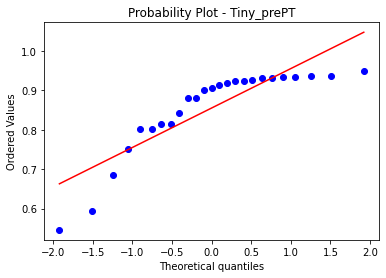

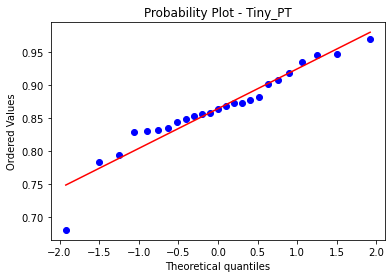

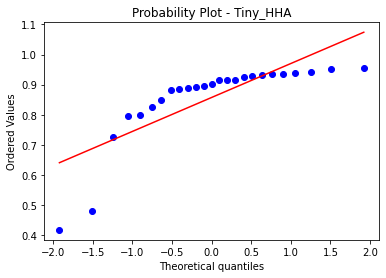

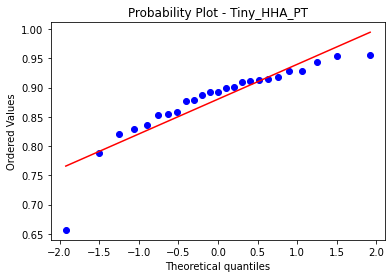

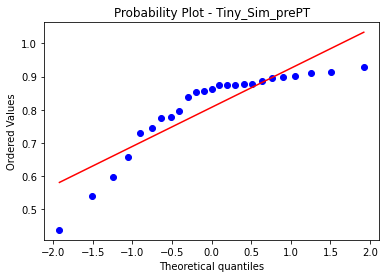

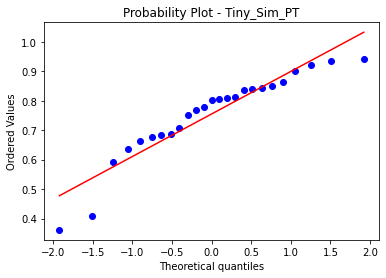

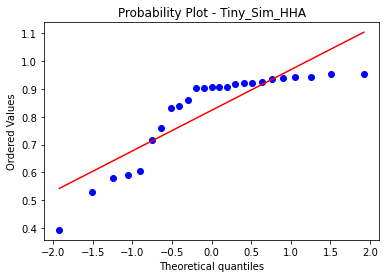

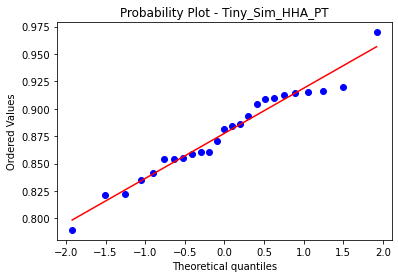

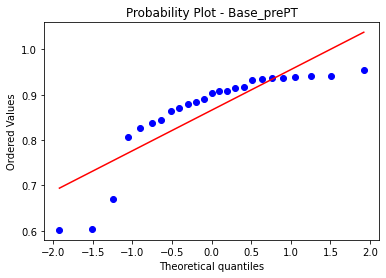

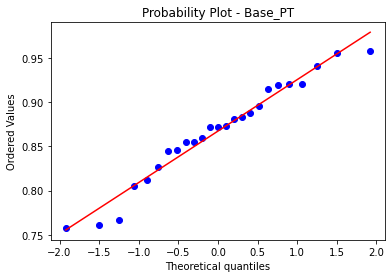

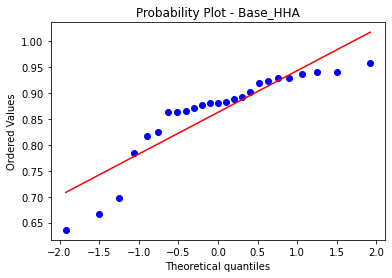

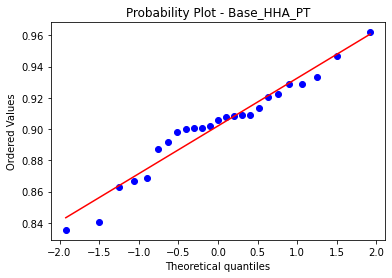

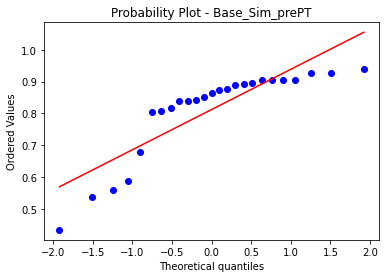

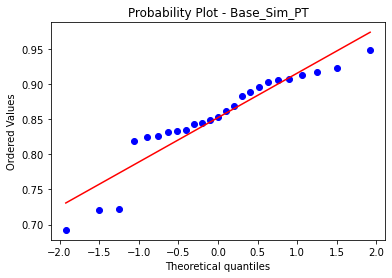

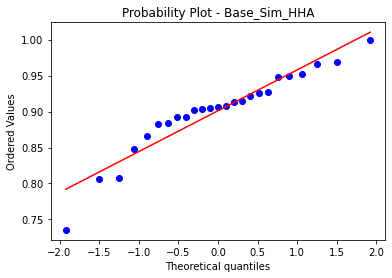

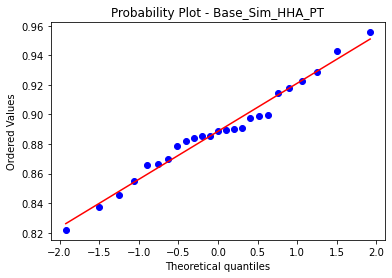

In [3]:
for col in results.columns:
    stats.probplot(results[col], dist='norm', plot=plt)
    plt.title(f'Probability Plot - {col}')
    plt.show()

In [4]:
ratio = results.std().max() / results.std().min()
print(f'Ratio of largest to smallest standard deviatio is {ratio}')

Ratio of largest to smallest standard deviatio is 5.326692274385566


In [5]:
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = results.mean().mean()
SSTR = len(list(results.columns)) * (results.mean() - x_bar)**2
SSTR = pd.DataFrame({'precision': SSTR.values})
anova_table['SS']['Between Groups'] = SSTR['precision'].sum()

# calculate SSE and update anova table
SSE = (results.count() - 1) * results.std()**2
SSE = pd.DataFrame({'precision': SSE.values})
anova_table['SS']['Within Groups'] = SSE['precision'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['precision'].sum() + SSE['precision'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = len(list(results.columns)) - 1
anova_table['df']['Within Groups'] = results.count().sum() - len(list(results.columns))
anova_table['df']['Total'] = results.count().sum() - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,0.35468,15,0.023645,2.503773,0.001531,1.867302
Within Groups,3.626446,384,0.009444,,,
Total,3.981126,399,0.009978,,,


In [6]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 2.5037729673419284  and p value is: 0.0015312826941328295
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2.5037729673419284  and critical value is: 1.8673022951541363
Null Hypothesis is rejected.
